In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error as mse

In [4]:
BTC_data_hours = pd.read_csv('../input/kernel-for-inputting-data/Imp1_BTC_data_hours.csv', parse_dates=True, index_col = 0)
BTC_data_days = pd.read_csv('../input/kernel-for-inputting-data/Imp1_BTC_data_days.csv', parse_dates=True, index_col = 0)
BTC_data_weeks = pd.read_csv('../input/kernel-for-inputting-data/Imp1_BTC_data_weeks.csv', parse_dates=True, index_col = 0)
BTC_data_months = pd.read_csv('../input/kernel-for-inputting-data/Imp1_BTC_data_months.csv', parse_dates=True, index_col = 0)

In [5]:
def ts_train_test_split(series, start_walk):
    train, test = series[series.index < start_walk], series[series.index >= start_walk]
    return train, test

In [100]:
train, test = ts_train_test_split(BTC_data_weeks,BTC_data_weeks.index[-1*sum(BTC_data_weeks.index.year!=2020)])

In [208]:
train, test = ts_train_test_split(BTC_data_weeks,BTC_data_weeks.index[-1*sum(BTC_data_weeks.index.year!=2020)])

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


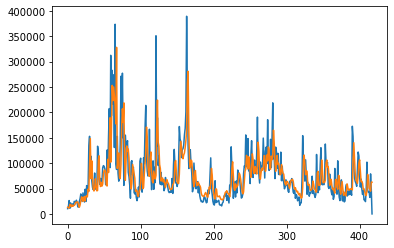

In [209]:
history = [x for x in train.iloc[0:,0]]
forecasts = []
for t in range(0,test.shape[0]):
    model = ARIMA(history,(2,0,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0][0]
    forecasts.append(yhat)
    history.append(test.iloc[t,0])

#print(forecasts)
#print(test.head(t).values)
plt.plot(test.values)
plt.plot(forecasts)

In [210]:
df = pd.DataFrame({'forecast':forecasts,'True':test.values.reshape(1,test.size)[0]}, index=test.index, )
round(mse(df['forecast'], df['True'], squared=False), 3)

42940.214

In [211]:
train, test = ts_train_test_split(BTC_data_months,BTC_data_months.index[-1*sum(BTC_data_months.index.year!=2020)])

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:220: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)


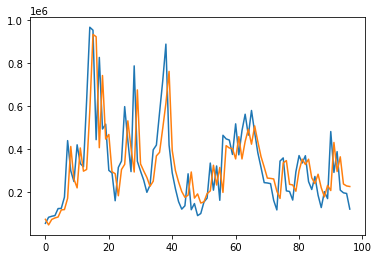

In [212]:
history = [x for x in train.iloc[0:,0]]
forecasts = []
for t in range(0,test.shape[0]):
    model = ARIMA(history,(1,0,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0][0]
    forecasts.append(yhat)
    history.append(test.iloc[t,0])

#print(forecasts)
#print(test.head(t).values)
plt.plot(test.values)
plt.plot(forecasts)

In [213]:
df = pd.DataFrame({'forecast':forecasts,'True':test.values.reshape(1,test.size)[0]}, index=test.index, )
round(mse(df['forecast'], df['True'], squared=False), 3)

152977.756

In [214]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(df['forecast'], df['True']))

In [215]:
rms

152977.7563972556

In [132]:
import seaborn as sns

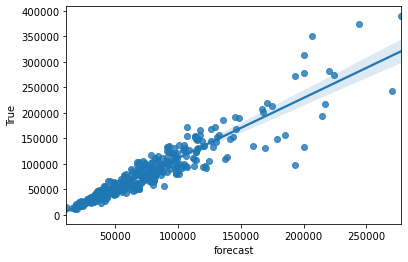

In [134]:
sns.regplot(x=df['forecast'], y=df['True'])

In [152]:
round(mse(df['forecast'], df['True'], squared=False), 3)

151273.354

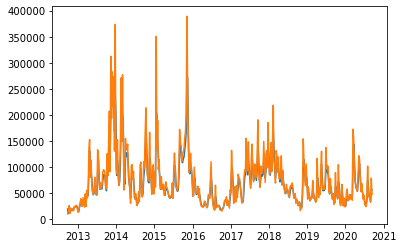

In [127]:
plt.plot(df['True'])
plt.plot(df['forecast'])